# Damped oscillations of a single degree of freedom system

[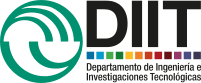](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

> **Reference**
>- Section 6.3 "Damped Harmonic Motion". Jerry B. Marion. Classical Dynamics of particles and systems. Academic Press.


## Damping force proportional to velocity

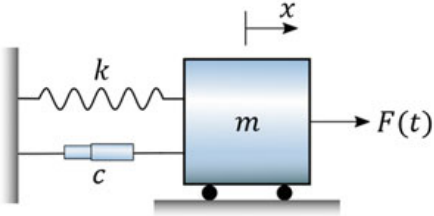

A force $\vec{F}(t)$ is exerted upon a system with the following characteristics:

- m : mass
- c : damping coefficient for a force proportional to velocity
- k : spring constant following Hooke's law $F_\mathrm{spring} = - k x$

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration
import warnings
warnings.filterwarnings("ignore")

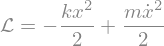

In [2]:
t = sm.symbols('t') # time
m, k, c = sm.symbols('m, k, c', positive = True)
x, F = me.dynamicsymbols('x F')
N = sm.physics.vector.ReferenceFrame('N') # frame of reference N using cartesian coordinates
r_m = x* N.x

oneHalf = sm.Rational(1,2) # we can use 0.5 
v_m = r_m.diff(t,N)
T = oneHalf* m* v_m.dot(v_m)

V = oneHalf* k* r_m.dot(r_m)

L = sm.Eq(sm.Symbol('\mathcal{L}'), T - V).simplify()
L

The nonconservative forces exerted upon the system.

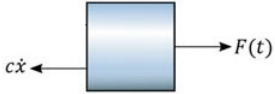

In [3]:
f = F* N.x - c* r_m.diff(t,N)
f

Given that the generalized coordinate used is the vector component, its corresponding generalized force is the resultant of forces ($\delta W = f \delta x = Q_x \delta x$).

In [4]:
x_Q_symbol = sm.Symbol('Q_x')
x_Q = f.dot(N.x)
sm.Eq(x_Q_symbol, x_Q)

We usually write the Euler-Lagrange equation with generalized forces as
$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} 
- \frac{\partial}{\partial q_i} \mathcal{L} = Q_i ,
$$
in this case is

In [5]:
x_dtdqp = L.rhs.diff(x.diff(t) ).diff(t)
x_dq = L.rhs.diff(x)
x_EL_noForces = x_dtdqp - x_dq
x_EL = sm.Eq(x_EL_noForces.simplify(), x_Q)
x_EL

For the analysis of oscillations, the equation of dynamics is usually written leaving the forcing force aside.

In [6]:
x_EL_noForcing = sm.solve(x_EL, F)[0] 
sm.Eq( x_EL_noForcing, F) 

### Rotations

It must not be forgotten that the generalized coordinate can be an angle $\theta$ and in that case the corresponding Euler-Lagrange equation is
$$
\Gamma \dot{\theta} + \kappa \theta + I \ddot{\theta} = \tau,
$$
where the coefficients are
- $\Gamma$ : rotational friction
- $\kappa$ : torsional stiffness
- $I$ : moment of inertia
- $\tau$ : torque (the generalized force that corresponds to $\theta$)

## Dynamics without external forcing

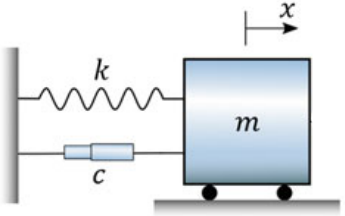

If there is no external force ($F = 0$), the previous linear differential equation is homogeneous.

In [7]:
x_EL_homogeneous =  x_EL_noForcing.subs(F,0)
sm.Eq(x_EL_homogeneous, 0)

We usually divide by the mass, 

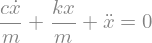

In [8]:
x_EL_mass = (x_EL_homogeneous/ m).expand()
sm.Eq(x_EL_mass, 0)

to assign particular symbols to the coefficients of $x$ and $\dot{x}$:
- natural frequency of oscillation of the system: $\omega = \sqrt{\frac{k}{m} }$,
- damping ratio (or damping rate): $\zeta = \frac{c}{C_c}$, where $C_c = 2 \sqrt{k m} = 2 m \omega$ is the critical damping coefficient.

In [9]:
omega, zeta = sm.symbols('omega zeta', real = True)
x_EL_ing = x_EL_mass.subs([(k/m, omega**2), (c/m, 2* zeta* omega) ]).simplify()
sm.Eq((x_EL_ing).expand(), 0)

The solution using complex exponential functions

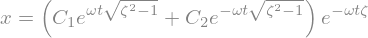

In [10]:
x_EL_ing_sol = sm.dsolve(x_EL_ing)
x_EL_ing_sol.simplify()

is a linear combination of the two possible solutions, with coefficients $C_i$.

### Relaxation period $\tau$
Regardless of the behavior that $x(t)$ presents as a function of $\zeta$, the term $\operatorname{e}^{- \omega \zeta t}$ is responsible for reducing the amplitude as $t$ increases.
In fact, each time this **relaxation period** $\tau = \frac{1}{\omega \zeta}$ elapses, the amplitude decays by $\operatorname{e}^{-1}$.
It is considered that after $\sim 10 \tau$ the oscillation is considered extinct.

### Critically damped, $\zeta = 1$
If $\zeta = 1$ the simplest behavior is achieved.

In [11]:
x_crit = x_EL_ing_sol.subs(zeta,1).simplify()
x_crit

which is an exponential decay toward the equilibrium position.

To visualize these behaviors, the $C_i$ can be determined as a function of the known $x$ and $\dot{x}$ at a given $t$, the so-called initial conditions.
If for $t_0 = 0$ we know $x_0 = x(t_0)$ and $\dot{x}_0 = \dot{x}(t_0)$

In [12]:
x_0, dx_0 = sm.symbols('x_0 \dot{x}_0', real=True)
crit_condInit = [sm.Eq(x_0, x_crit.args[1].subs(t, 0) ), sm.Eq(dx_0, x_crit.args[1].diff(t).subs(t, 0) ) ]
crit_condInit

where we can solve for $C_i$ 

In [13]:
crit_condInit_sol = sm.solve(crit_condInit)
crit_condInit_sol

In [14]:
x_crit_condInit = x_crit.subs(crit_condInit_sol[0] )
x_crit_condInit.simplify()

For example, if we assign

In [15]:
k = 100 # [N m-1]
m = 1 # [kg]
x_0_magnitude = 1 # [m]
dx_0_magnitude = -100 # [m s-1]

parameters ={
    x_0 : x_0_magnitude,
    dx_0 : dx_0_magnitude,
    omega : sm.sqrt(k/m)
}
x_crit_parameters = x_crit_condInit.subs(parameters)
x_crit_parameters

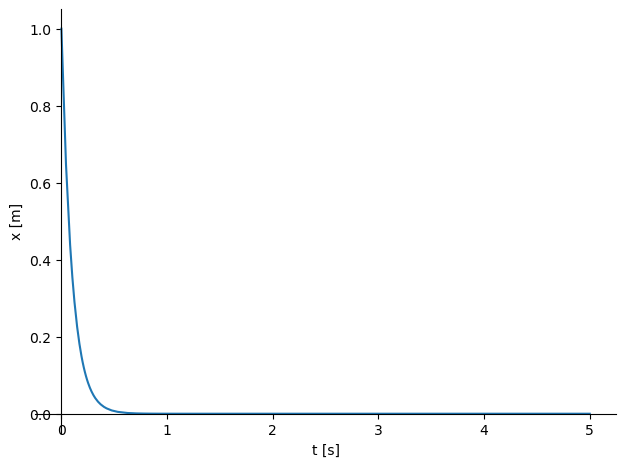

In [16]:
sm.plot(x_crit_parameters.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### Over-damped, $\zeta > 1$
If the damping is even more pronounced, e.g. $\zeta = 2$.

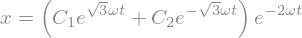

In [17]:
x_over = x_EL_ing_sol.subs(zeta, 2).simplify()
x_over

there will also be an exponential approach to $x=0$, but there may be violent oscillations before reaching the equilibrium point.

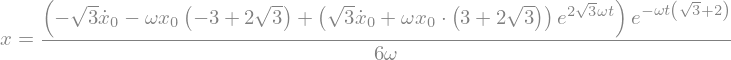

In [18]:
over_condInit = [sm.Eq(x_0, x_over.args[1].subs(t, 0) ), sm.Eq(dx_0, x_over.args[1].diff(t).subs(t, 0) ) ]
over_condInit_sol = sm.solve(over_condInit)
x_over_condInit = x_over.subs(over_condInit_sol[0] )
x_over_condInit.simplify()

Using the same initial conditions

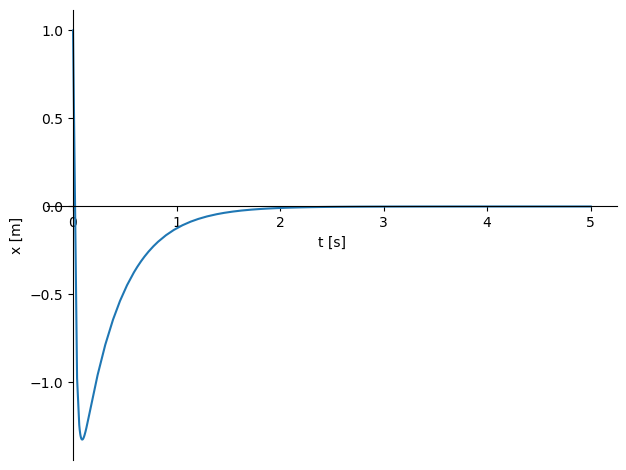

In [19]:
x_over_parameters = x_over_condInit.subs(parameters)
sm.plot(x_over_parameters.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### Under-damped, $0< \zeta < 1$
The most frequent case is when it is desired that the damping not be abrupt

In [20]:
x_sub = x_EL_ing_sol.subs(zeta, 0.2)
x_sub

The complex exponentials with $i t$ can be rewritten as trigonometric functions using Euler's identity $\mathrm{e}^{\pm i \theta}= \cos{\theta}+ i \sin{\theta}$.
$$
x= \left[ (C_1+ C_2) \cos{\omega t} + i(C_1- C_2) \sin{\omega t} \right] \operatorname{e}^{- \zeta \omega t}
$$
which shows that a reduction in the amplitude of oscillations around the equilibrium position will be observed.

And write a solution of the dynamics as a function of such conditions

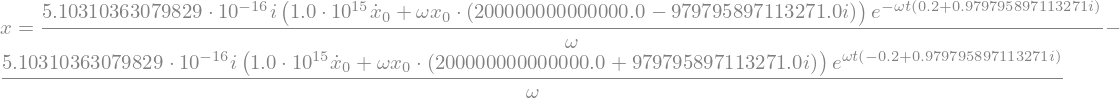

In [21]:
sub_condInit = [sm.Eq(x_0, x_sub.args[1].subs(t, 0) ), sm.Eq(dx_0, x_sub.args[1].diff(t).subs(t, 0) ) ]
sub_condInit_sol = sm.solve(sub_condInit)
x_sub_condInit = x_sub.subs(sub_condInit_sol[0] )
x_sub_condInit

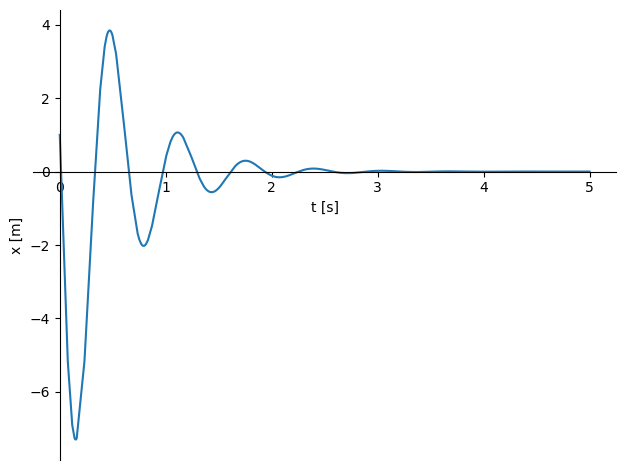

In [22]:
x_sub_parameters = x_sub_condInit.subs(parameters)
sm.plot(x_sub_parameters.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

### No damping, $\zeta = 0$

In [23]:
x_noDamping = x_EL_ing_sol.subs(zeta, 0)
x_noDamping

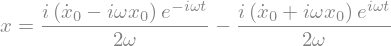

In [24]:
noDamping_condInit = [sm.Eq(x_0, x_noDamping.args[1].subs(t, 0) ), sm.Eq(dx_0, x_noDamping.args[1].diff(t).subs(t, 0) ) ]
noDamping_condInit_sol = sm.solve(noDamping_condInit)
x_noDamping_condInit = x_noDamping.subs(noDamping_condInit_sol[0] )
x_noDamping_condInit

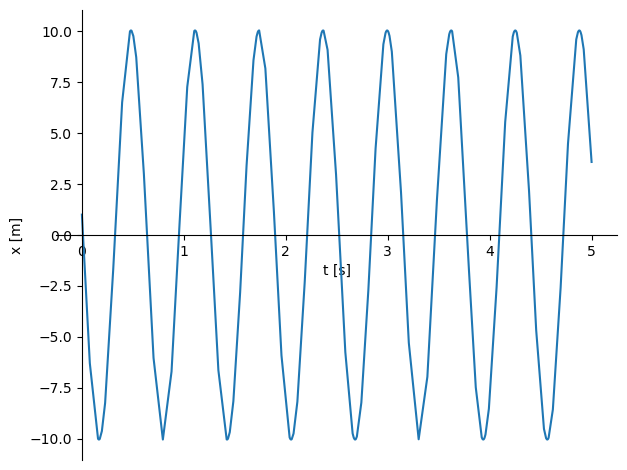

In [25]:
x_noDamping_parameters = x_noDamping_condInit.subs(parameters)
sm.plot(x_noDamping_parameters.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 